# Artificial Intelligence
# 464
# Project #4

## Before You Begin...
00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, and
02.  Check the submission deadline on Gradescope.


## General Directions for this Assignment
00. Output format should be exactly as requested,
01. Functions should do only one thing,
02. Keep functions to 20 lines or less (empty lines are fine, there's leeway, but don't blatantly ignore this),
03. Add docstring to all functions,


## Before You Submit...
00. Re-read the general instructions provided above, and
01. Hit "Kernel"->"Restart & Run All". The first cell that is run should show [1], the second should show [2], and so on...
02. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
03.  Do not submit any other files.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
import random

You might need to do a install to work with networkx

```
pip install networkx
```

## Part 1: Constraint Satisfaction

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


In [3]:
def color_map(constraint_graph, color_list, trace=False):
    """
    This function colors a map provided as a constraint graph (dict keys: nodes, edges, and coordinate)
    The inputs are the constraint graph and a list of colors. 
    Implementation should feature: 
    1) Backtracking, 2) Forward Checking, 3) variables picked using MRV, and 4) Values picked using LCV. 
    Each feature should be its own helper function.  
    The trace is a flag that when set to True, prints out statements that state what the algorithm
    is currently doing (in terms of the four features)
    Return a list of (node name, assigned color) tuples, where 
    the ordering matches the original ordering of nodes in the constraint_graph. 
    For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, 
    your function might return `[("A", "Yellow"), ("B", "Green")]`
    If the CSP cannot find a solution, `None` is returned.
    """
    # Fix. Everything is colored red right now. 
    # With your implementation, if a solution can't be found, it should return `None`.
    # Add features: 
    # 1) Backtracking, 
    # 2) Forward Checking, 
    # 3) Variables picked using MRV, and 
    # 4) Values picked using LCV 
    # Features should be helper functions
    
    return [(n, "red") for n in constraint_graph["nodes"]]

In [4]:
def test_coloring(constraint_graph, solution):
    """
    This function tests the solution resulting from `color_map`. 
    Adjacent nodes in the solution cannot be of the same color.
    constraint_graph is the dict with keys: nodes, edges, and coordinates.
    solution is a list of (node name, assigned color) tuples
    Returns a warning statement if there's a violation
    """
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

In [5]:
def draw_map(title, constraint_graph, size, solution=None):
    """
    This function uses Networkx to draw the `constraint_graph` (dict keys: nodes, edges, and coordinate) 
    Nodes are colored using `solution`, a list of (node name, assigned color) tuples
    title is the title for the cartoon
    size is in inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
    """
    
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [6]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

## Test Connecticut Solution

In [7]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

Fairfield and Litchfield are adjacent but have the same color.
Fairfield and New Haven are adjacent but have the same color.
Litchfield and New Haven are adjacent but have the same color.
Litchfield and Hartford are adjacent but have the same color.
New Haven and Hartford are adjacent but have the same color.
New Haven and Middlesex are adjacent but have the same color.
Hartford and Middlesex are adjacent but have the same color.
Hartford and Tolland are adjacent but have the same color.
Hartford and New London are adjacent but have the same color.
Middlesex and New London are adjacent but have the same color.
Tolland and New London are adjacent but have the same color.
Tolland and Windham are adjacent but have the same color.
New London and Windham are adjacent but have the same color.


## Draw Connecticut Cartoon

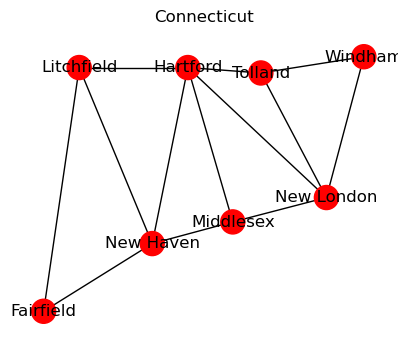

In [8]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [9]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

## Test Connecticut Solution

In [10]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

Fairfield and Litchfield are adjacent but have the same color.
Fairfield and New Haven are adjacent but have the same color.
Litchfield and New Haven are adjacent but have the same color.
Litchfield and Hartford are adjacent but have the same color.
New Haven and Hartford are adjacent but have the same color.
New Haven and Middlesex are adjacent but have the same color.
Hartford and Middlesex are adjacent but have the same color.
Hartford and Tolland are adjacent but have the same color.
Hartford and New London are adjacent but have the same color.
Middlesex and New London are adjacent but have the same color.
Tolland and New London are adjacent but have the same color.
Tolland and Windham are adjacent but have the same color.
New London and Windham are adjacent but have the same color.


## Draw Connecticut Cartoon

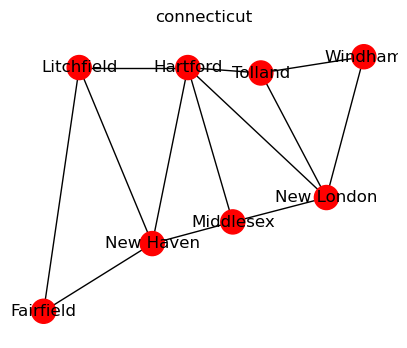

In [11]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [12]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [13]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [14]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

Iceland and Ireland are adjacent but have the same color.
Iceland and United Kingdom are adjacent but have the same color.
Ireland and United Kingdom are adjacent but have the same color.
United Kingdom and France are adjacent but have the same color.
United Kingdom and Belgium are adjacent but have the same color.
United Kingdom and Netherlands are adjacent but have the same color.
United Kingdom and Norway are adjacent but have the same color.
Portugal and Spain are adjacent but have the same color.
Spain and France are adjacent but have the same color.
Spain and Italy are adjacent but have the same color.
France and Belgium are adjacent but have the same color.
France and Luxembourg are adjacent but have the same color.
France and Germany are adjacent but have the same color.
France and Switzerland are adjacent but have the same color.
France and Italy are adjacent but have the same color.
Belgium and Netherlands are adjacent but have the same color.
Belgium and Luxembourg are adjac

## Draw Europe Cartoon

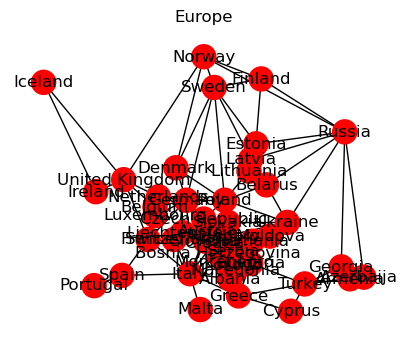

In [15]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [16]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [17]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

Iceland and Ireland are adjacent but have the same color.
Iceland and United Kingdom are adjacent but have the same color.
Ireland and United Kingdom are adjacent but have the same color.
United Kingdom and France are adjacent but have the same color.
United Kingdom and Belgium are adjacent but have the same color.
United Kingdom and Netherlands are adjacent but have the same color.
United Kingdom and Norway are adjacent but have the same color.
Portugal and Spain are adjacent but have the same color.
Spain and France are adjacent but have the same color.
Spain and Italy are adjacent but have the same color.
France and Belgium are adjacent but have the same color.
France and Luxembourg are adjacent but have the same color.
France and Germany are adjacent but have the same color.
France and Switzerland are adjacent but have the same color.
France and Italy are adjacent but have the same color.
Belgium and Netherlands are adjacent but have the same color.
Belgium and Luxembourg are adjac

## Draw Europe Cartoon

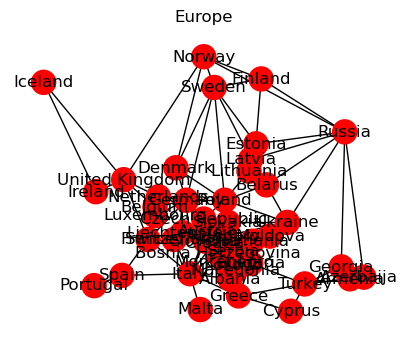

In [18]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Part 2: Genetic Algorithms
Genetic algorithms can approximate the same constraint satisfaction solutions that we programmed algorithmically. We have provided some code to help you get started.

Color Europe from using four colors: ["red", "blue", "green", "yellow"]. 

Your implementation should:

* Start with a random population of candidates
* Run for a defined number of generations
* Select parents (implement tournament)
* Apply Crossover
* Apply Mutation
* Apply Culling (remove a fraction of the lowest fitness individuals from the new population)

You'll need encoders/decoders to switch between genomes and phenomes. 

You'll need an approproate fitness function. 

You'll need a suite of tunable parameters (number of generations, crossover rate, location, mutation rate, location, value, culling rate, and so on).

Every ten generations, print out the generation number, the fitness, genotype, and phenotype of the best individual in the population for the specific generation. Return the best individual of the entire run (in the same format).

Feel free to port over helper functions from your solution from Part #1

In [ ]:
def initialize_population(): # TODO Add parameters
    """
    Add docstring here
    """
    # Your code here
    pass

In [ ]:
def fitness(): # TODO Add parameters
    """
    Add docstring here
    """
    # Your code here
    pass

In [ ]:
def tournament_selection(): # TODO Add parameters
    """
    Selects the best individual from a subset of the population using a tournament-style selection process. This helps maintain a balance between exploration and exploitation by favoring individuals with higher fitness while still allowing for some randomness.
    Add docstring here
    """
    # Your code here
    pass

In [ ]:
def crossover(): # TODO Add parameters
    """
    Performs crossover (recombination) between two parent individuals to produce a child. The crossover is applied with a probability determined by crossover_rate, where a higher rate means a higher chance of crossover occurring.
    Add docstring here
    """
    # Your code here
    pass

In [ ]:
def mutate(): # TODO Add parameters
    """
    Mutates an individual by randomly changing the color of one of its nodes, based on a given mutation rate. The mutation ensures that the new color is different from the current one.
    Add docstring here
    """
    # Your code here
    pass

In [ ]:
def cull_population(): # TODO Add parameters
    """
    Reduces the population size by selecting the best individuals based on their fitness scores. The individuals with the lowest fitness are culled, and only a specified proportion of the population is retained.
    Add docstring here
    """
    # Your code here
    pass

In [ ]:
def report_fitness(generation, best_fitness, best_individual, color_list, constraint_graph):
    """
    Reports the fitness of the best individual in the current generation.

    * **generation** int: The current generation number.
    * **best_fitness** float: The fitness score of the best individual.
    * **best_individual** list: The genotype of the best individual, represented as a list of color indices.
    * **color_list** list: A list of available colors. Each color is represented as a string (e.g., "red", "blue").
    * **constraint_graph** dict: A dictionary representing the constraint graph, including nodes and their neighbors (edges).
    """
    print(f"Generation {generation}: Best Fitness {best_fitness}, "
            f"Genotype {best_individual}, "
            f"Phenotype {[color_list[gene] for gene in best_individual]}")
    
    solution = [(constraint_graph["nodes"][i], color_list[best_individual[i]]) for i in range(len(best_individual))]
    draw_map(f"Generation {generation}", constraint_graph, size=(10, 8), solution=solution)

In [ ]:
def genetic_algorithm(color_list, constraint_graph, hyperparameters, trace=False):
    """
    Executes a genetic algorithm to solve a graph coloring problem by evolving a population of individuals over multiple generations. Each individual represents a potential solution, where nodes of the graph are assigned colors. The goal is to minimize conflicts between neighboring nodes sharing the same color.

    * **color_list** list: A list of available colors. Each color is represented as a string (e.g., "red", "blue").
    * **constraint_graph** dict: A dictionary representing the constraint graph, including nodes and their neighbors (edges).
    * **hyperparameters** dict: A dictionary containing hyperparameters for the genetic algorithm.
    * **trace** bool: If True, prints detailed information about the evolution process.

    **returns** list: The best individual found after NUM_GENERATIONS generations, represented as a list of color indices corresponding to each node in the graph. Additionally, the algorithm prints the best fitness, genotype, and phenotype at various points during the execution.
    """
    population = ... # TODO initialize_population 
    neighbor_set = ... # TODO create neighbor set from constraint_graph
    best_individual = None
    best_fitness = float('-inf')

    for generation in range(hyperparameters["NUM_GENERATIONS"]):
        # TODO Evaluate fitness of the population

        # Report the best individual and fitness found so far
        if trace and generation % 10 == 0:
            report_fitness(generation, best_fitness, best_individual, color_list, constraint_graph)

        # TODO Create new population through selection, crossover, mutation, and culling

    # Final report of the best solution found
    if trace:
        print("Final report:")
        report_fitness(hyperparameters["NUM_GENERATIONS"], best_fitness, best_individual, color_list, constraint_graph)
    
    return best_individual, best_fitness


In [ ]:
def color_map_genetic(constraint_graph, color_list, hyperparameters, trace=False):
    """
    Executes a genetic algorithm to solve a graph coloring problem by evolving a population of individuals over multiple generations. Each individual represents a potential solution, where nodes of the graph are assigned colors. The goal is to minimize conflicts between neighboring nodes sharing the same color.

    * **constraint_graph** dict: A dictionary representing the constraint graph, including nodes and their neighbors (edges).
    * **color_list** list: A list of available colors. Each color is represented as a string (e.g., "red", "blue").
    * **hyperparameters** dict: A dictionary containing hyperparameters for the genetic algorithm.
    * **trace** bool: If True, prints detailed information about the evolution process.

    **returns** list: The best individual found after NUM_GENERATIONS generations, represented as a list of color indices corresponding to each node in the graph.
    """
    best_individual, best_fitness = genetic_algorithm(color_list, constraint_graph, hyperparameters, trace)
    if ...: # TODO Check if best_fitness indicates a valid solution
        return [(constraint_graph["nodes"][i], color_list[best_individual[i]]) for i in range(len(best_individual))]
    else:
        print("No valid solution found.")
        return None

#### Hyperparameters:
- **NUM_GENERATIONS** int: The number of generations for the genetic algorithm to evolve through. The higher this number, the longer the algorithm runs.
- **POPULATION_SIZE** int: The size of the population at each generation. A larger population can explore the solution space more thoroughly but increases computational cost.
- **CROSSOVER_RATE** float: The probability that two selected parents will undergo crossover. A higher rate means more offspring will be produced by recombination.
- **MUTATION_RATE** float: The probability that a mutation will occur in a given individual. This introduces genetic diversity and helps avoid local optima.
- **CULLING_RATE** float: The proportion of the population that will be culled (removed) at the end of each generation. A higher culling rate means only the fittest individuals are retained.
- **TOURNAMENT_SIZE** int: The number of individuals selected for tournament selection. Larger values give stronger individuals a higher chance of being selected.

In [ ]:
# TODO: Define the parameters for the genetic algorithm
num_generations: int   = ...
population_size: int   = ...
crossover_rate : float = ...
mutation_rate  : float = ...
culling_rate   : float = ...
tournament_size: int   = ...

hyperparameters = {
    "NUM_GENERATIONS": num_generations,
    "POPULATION_SIZE": population_size,
    "CROSSOVER_RATE": crossover_rate,
    "MUTATION_RATE": mutation_rate,
    "CULLING_RATE": culling_rate,
    "TOURNAMENT_SIZE": tournament_size
}

In [ ]:
europe_solution = color_map_genetic(europe_graph, ["red", "blue", "green", "yellow"], hyperparameters, trace=True) # Feel free to add parameters

In [ ]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

In [ ]:
if europe_solution:
    draw_map("Europe", europe_graph, (10, 8), europe_solution)

## Before You Submit...

00. Re-read the general instructions provided above, and
01. Hit "Kernel"->"Restart & Run All". The first cell that is run should show [1], the second should show [2], and so on...
02. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
03.  Do not submit any other files.